In [8]:
import pandas as pd
import csv
import sympy as sp
import numpy as np
import random
import matplotlib.pyplot as plt

#generates a random number sampled from a normal distribution of mean = mu and standard deviation = sigma
def white_noise(mu, sigma):
    data = np.random.randn(100000) * sigma + mu
    result = random.choice(data)
    return result

#is equal to 1 at timestep = 50 and 0 everywhere else
def discrete_delta(t):
    result = 0
    if t ==50:
        result = 1 
    else:
        result = 0
    return result

#actual params
a = -0.8
b = 0.5
theta_hat_0 = np.array([0,0])
theta_0 = np.array([a, b])
P0 = 100*np.identity(2)
sigma = 0.5
Y0 = np.array([0,0]) @ theta_0 + white_noise(0, sigma)

sample_depth = 1000


In [11]:
#init u_t values
u_t = []
for i in range(0, sample_depth+1):
    u_t.append(discrete_delta(i))

#init lists of variables
P = [P0]
Y = [Y0]
PHI = []
theta_hat = [theta_hat_0]
a_hat = []
b_hat = []
time = []

#loop thru timesteps
for k in range(1,sample_depth):
    # same as phi = [-Y(k-1); u_t(k-1)];, line 31 on matlab code
    phi = np.array([-Y[k-1], u_t[k-1]])
    
    #same as PHI = [PHI; phi.']; line 32 on matlab code
    PHI.append(phi.T)
    
    #same as Y = [Y (phi.'*theta0 + rand*sigma)]; line 33 of matlab code
    Y.append(phi.T @ theta_0 + white_noise(0, sigma))
    try:
        #calculate P(t). P_k is P(t) = inv(PHI.'PHI) 
        P_k = np.linalg.inv(np.array(PHI).T @ np.array(PHI))
    except:
        #for some reason its singular at k=1, but good at every other index
        #can change P_k to whatever 2x2 matrix and it always converges for a_hat
        P_k = np.identity(2)

    #append to list of P values
    #same as P{k} = (cell2mat(P(k-1))\eye(2) + phi*phi.')\eye(2); line 35 on matlab code
    P.append(P_k)
    
    #calculate K, same as line 36 on matlab
    K = P[k] @ phi
    
    #add to list of theta_hats to plot, same as line 37 on matlab code
    theta_hat_k = theta_hat[k-1] + K*(Y[k] - phi.T @ theta_hat[k-1])
    theta_hat.append(theta_hat_k)
    
    #seperate into 2 seperate lists to plot
    a_hat.append(theta_hat[k][0])
    b_hat.append(theta_hat[k][1])
    time.append(k)
    
#print last 5 values of estimated params
print("last 5 a_hat values:")
print(a_hat[995:])
print(" ")
print("last 5 b_hat values:")
print(b_hat[995:])

last 5 a_hat values:
[-0.8041416432301616, -0.8044672113668575, -0.804749004786165, -0.8050364921885796]
 
last 5 b_hat values:
[0.6886802139937249, 0.6885244277605613, 0.6883895879824132, 0.6882520236004726]


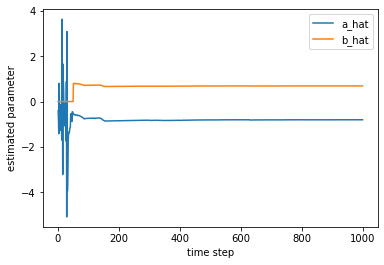

In [12]:
#plot params changing over time
plt.plot(time,a_hat, label = "a_hat")
plt.plot(time,b_hat, label = "b_hat")

plt.xlabel("time step")
plt.ylabel("estimated parameter")
plt.legend()

plt.show()
